In [1]:
import os
os.chdir("../")
print(os.getcwd())

/home/christian/Master/Tesis/projects/mapping_biological_data


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
SHAPE_FILE = "depto.shp"
SHP_FILE_PATH = "data/external/depto/{}".format(SHAPE_FILE)
SHP_FILE = gpd.read_file(SHP_FILE_PATH)


In [4]:
depto_shp_raw = SHP_FILE
depto_shp_awgs = depto_shp_raw.to_crs(epsg=4326)

In [5]:
depto_shp_awgs.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30393 8.61651, -76.29474 8.61361..."
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.86717 10.35843, -74.87297 10.340..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.01949 4.79225, -74.02298 4.78075..."
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15608 10.42083, -75.15088 10.406..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.20951 7.02466, -72.20261 7.02176..."


In [6]:
depto_shp_awgs['centroid'] = depto_shp_awgs.centroid.head()

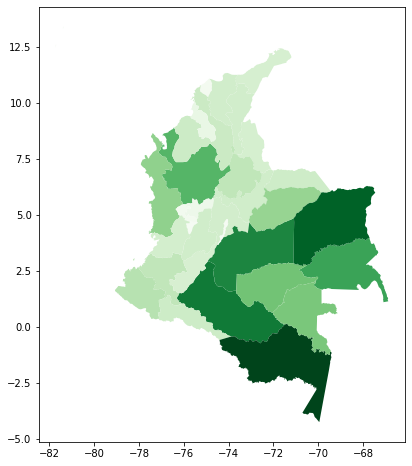

In [7]:
depto_shp_awgs.plot(column='AREA', 
                   figsize=(10,8),
                   cmap='Greens', 
                   )

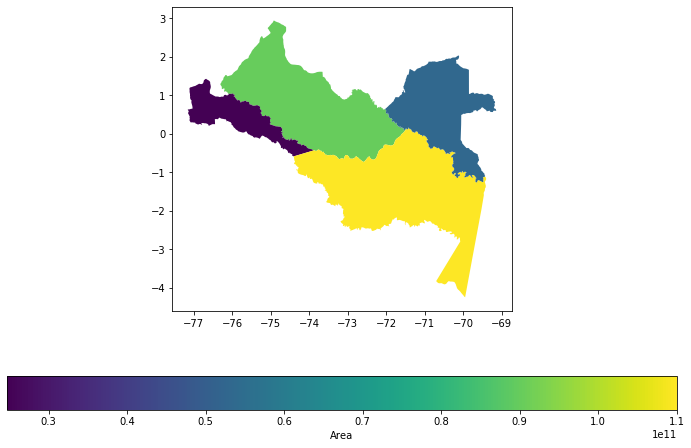

In [8]:
depto_shp_awgs.cx[:,:0].plot(column='AREA',
                             figsize=(12, 8),
                             legend=True, 
                             legend_kwds = {'label': 'Area', 
                                           'orientation': 'horizontal'}
                            )

In [9]:
print("COLOMBIA COORDINATES")
depto_shp_awgs.bounds.describe()

COLOMBIA COORDINATES


,minx,miny,maxx,maxy
count,33.000000,33.000000,33.000000,33.000000
mean,-75.359108,4.183640,-73.081883,6.541631
std,2.261299,3.722305,2.950007,3.409935
min,-81.735793,-4.250167,-81.349083,0.157424
25%,-76.515550,1.490606,-74.727958,3.984821
50%,-75.277183,4.132956,-73.765550,5.817766
75%,-74.152881,6.854563,-71.195429,9.263694
max,-70.856298,12.480327,-66.870391,13.394803


CPU times: user 97.1 ms, sys: 4.34 ms, total: 101 ms
Wall time: 94.4 ms


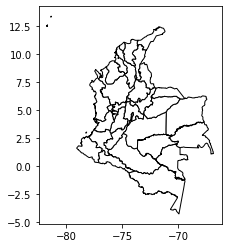

In [10]:
%%time
depto_shp_awgs.plot(color='w', edgecolor='k')

CPU times: user 86.7 ms, sys: 82 µs, total: 86.8 ms
Wall time: 83.9 ms


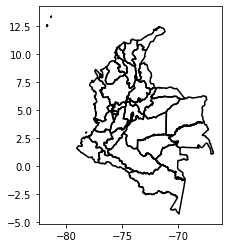

In [11]:
%%time
depto_shp_awgs.boundary.plot(color='k')

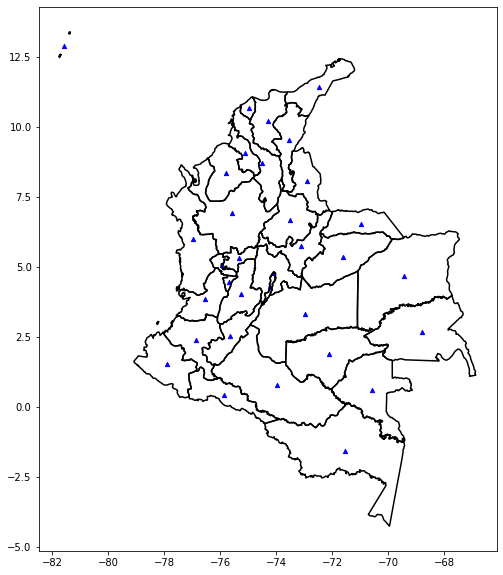

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

depto_shp_awgs.boundary.plot(ax=ax,
                    color='k', 
                   )
depto_shp_awgs.centroid.plot(ax=ax,
                             color='b',
                             marker='^',
                             markersize=18
                            )


In [13]:
deptos_gpd = depto_shp_awgs.copy(deep=True)
deptos_gpd['centroid'] = deptos_gpd.centroid
deptos_gpd.set_geometry(col='centroid', inplace=True)
deptos_sw = deptos_gpd.cx[-82:-74, -5.0:4.0]
deptos_se = deptos_gpd.cx[-74:-66, -5.0:4.0]
deptos_nw = deptos_gpd.cx[-82:-74, 4.0:13.0]
deptos_ne = deptos_gpd.cx[-74:-66, 4.0:13.0]

/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

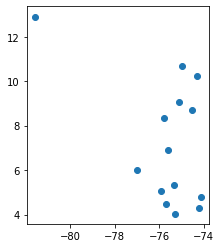

In [14]:
deptos_se['region'] = 'SE'
deptos_ne['region'] = 'NE'
deptos_sw['region'] = 'SW'
deptos_nw['region'] = 'NW'
deptos_nw.plot()
plt.show()
deptos_gpd = pd.concat([deptos_se, deptos_sw, deptos_ne, deptos_nw])

In [15]:
regions_gpd = deptos_gpd.dissolve(by='region', aggfunc='sum')

In [16]:
len(deptos_gpd)

33

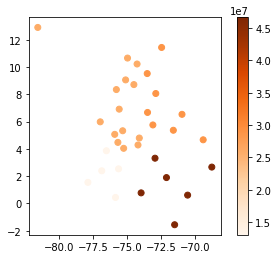

In [17]:
regions_gpd.plot(column='HECTARES',
               cmap='Oranges',
               legend=True)

In [469]:
deptos_shapes = depto_shp_awgs[['DPTO', 'geometry', 'NOMBRE_DPT']]
gpd.sjoin(deptos_shapes, deptos_shapes)

,DPTO_left,geometry,NOMBRE_DPT_left,index_right,DPTO_right,NOMBRE_DPT_right
0,05,"POLYGON ((-76.30393 8.61651, -76.29474 8.61361...",ANTIOQUIA,0,05,ANTIOQUIA
3,13,"POLYGON ((-75.15608 10.42083, -75.15088 10.406...",BOLIVAR,0,05,ANTIOQUIA
4,15,"POLYGON ((-72.20951 7.02466, -72.20261 7.02176...",BOYACA,0,05,ANTIOQUIA
5,17,"POLYGON ((-74.69160 5.74987, -74.68130 5.74817...",CALDAS,0,05,ANTIOQUIA
9,23,"POLYGON ((-75.81612 9.42022, -75.80571 9.41672...",CORDOBA,0,05,ANTIOQUIA
...,...,...,...,...,...,...
28,94,"POLYGON ((-67.68420 3.85762, -67.67901 3.84142...",GUAINIA,28,94,GUAINIA
29,95,"POLYGON ((-71.26111 2.83463, -71.25591 2.83063...",GUAVIARE,28,94,GUAINIA
30,97,"POLYGON ((-70.10947 1.98243, -70.11118 1.97323...",VAUPES,28,94,GUAINIA
31,99,"POLYGON ((-67.79329 6.27663, -67.76449 6.26903...",VICHADA,28,94,GUAINIA


In [19]:
centroid_shapes = depto_shp_awgs[['AREA', 'centroid']]

centroid_shapes = gpd.GeoDataFrame(centroid_shapes, geometry='centroid')

In [20]:
gpd.sjoin(deptos_shapes, deptos_shapes)

,DPTO_left,geometry,index_right,DPTO_right
0,05,"POLYGON ((-76.30393 8.61651, -76.29474 8.61361...",11,27
11,27,"POLYGON ((-77.01797 8.26892, -77.01047 8.26882...",11,27
19,66,"POLYGON ((-75.88315 5.47231, -75.88342 5.46895...",11,27
23,76,"POLYGON ((-76.08046 4.97077, -76.06436 4.95737...",11,27
0,05,"POLYGON ((-76.30393 8.61651, -76.29474 8.61361...",19,66
...,...,...,...,...
28,94,"POLYGON ((-67.68420 3.85762, -67.67901 3.84142...",28,94
29,95,"POLYGON ((-71.26111 2.83463, -71.25591 2.83063...",28,94
30,97,"POLYGON ((-70.10947 1.98243, -70.11118 1.97323...",28,94
31,99,"POLYGON ((-67.79329 6.27663, -67.76449 6.26903...",28,94


In [21]:
gpd.sjoin(deptos_shapes, deptos_shapes)

,DPTO_left,geometry,index_right,DPTO_right
0,05,"POLYGON ((-76.30393 8.61651, -76.29474 8.61361...",11,27
11,27,"POLYGON ((-77.01797 8.26892, -77.01047 8.26882...",11,27
19,66,"POLYGON ((-75.88315 5.47231, -75.88342 5.46895...",11,27
23,76,"POLYGON ((-76.08046 4.97077, -76.06436 4.95737...",11,27
0,05,"POLYGON ((-76.30393 8.61651, -76.29474 8.61361...",19,66
...,...,...,...,...
28,94,"POLYGON ((-67.68420 3.85762, -67.67901 3.84142...",28,94
29,95,"POLYGON ((-71.26111 2.83463, -71.25591 2.83063...",28,94
30,97,"POLYGON ((-70.10947 1.98243, -70.11118 1.97323...",28,94
31,99,"POLYGON ((-67.79329 6.27663, -67.76449 6.26903...",28,94


# Environmental Variables

In [161]:
from sklearn.datasets import fetch_species_distributions
from shapely.geometry import Point, Polygon

def load_environmental_data(granularity):
    granularity_x, granularity_y = granularity[0], granularity[1]
    # Get matrices/arrays of species IDs and locations
    data = fetch_species_distributions()
    
    # List of coverages
    columns = ['lat', 'log', 'Claud cover - annual',
               'Diurnal temperature range - annual',
               "Ecoreg","Frost frequency - annual", "h_dem",
               "Precipitation - annual","Precipitation - january",
               "Precipitation - april","Precipitation - july",
               "Precipitation - october","Mean temperature - annual",
               "Minimum temperature - annual","Maximum temperature - annual",
               "Vapour pressure - annual"]
    
    # Creating a list to store lat and long values along with coverages
    data_geo = []
    # Transforming the data for lat and long values:
    for i in range(1591):
          for j in range(1211):
            val = []
            if(j % granularity_x == 0 and i % granularity_y == 0):
              lat = 23.55 - i*0.05
              log = -94.8 + j*0.05
              val = [lat,log,data.coverages[0][i][j], data.coverages[1][i][j], data.coverages[2][i][j],data.coverages[3][i][j],data.coverages[4][i][j],data.coverages[5][i][j],data.coverages[6][i][j],data.coverages[7][i][j],data.coverages[8][i][j],data.coverages[9][i][j],data.coverages[10][i][j],data.coverages[11][i][j],data.coverages[12][i][j],data.coverages[13][i][j]]
              data_geo.append(val)

    df = pd.DataFrame(data_geo, columns=columns)
    return df


# Converting From Coordinate Pixels to Coordinate Points
def create_geometry(data_frame, longitudColumn ='log', latitudeColumn = 'lat'):
  geometry = [Point(x,y) for x,y in data_frame[[longitudColumn,latitudeColumn]].values]
  return geometry

# Assign a geometry index for each point in DataFrame
def data_frame_to_geo_data_frame(data_frame, crs, geometry):
  return gpd.GeoDataFrame(data_frame, crs=crs, geometry=geometry)



# Selecting info from Colombia 
def filter_to_colombia(global_dataframe):
    cond1 = (global_dataframe['lat'] > -5.0) & (global_dataframe['lat'] < 14.0) # Latitudes entre -5 y 14 grados 
    cond2 = (global_dataframe['log'] > -90.0) & (global_dataframe['log'] < -66.0) # Longitudes entre -90 y -66 grados
    columns = ['Claud cover - annual','Diurnal temperature range - annual',
               "Ecoreg","Frost frequency - annual", "h_dem", 
               "Precipitation - annual","Precipitation - january",
               "Precipitation - april","Precipitation - july",
               "Precipitation - october","Mean temperature - annual",
               "Minimum temperature - annual",
               "Maximum temperature - annual","Vapour pressure - annual"]
    cond3 = True
    for i in columns:
      cond3 = cond3 & (global_dataframe[i] != -128)& (global_dataframe[i] != -999)
    global_dataframe_copy = global_dataframe[(cond1) & (cond2) & (cond3)]
    return global_dataframe_copy

# Assigning each data Point his corresponding Depto
def merge_deptos_with_variables(deptos_shapes, data_points_geodf, method='mean'):
    inner_joint = gpd.sjoin(deptos_shapes, data_points_geodf, how='inner', op='intersects')
    var_per_depto = inner_joint.dissolve(by='DPTO', aggfunc=method)
    return var_per_depto

In [167]:
# Getting the variables Dataframe
ECOVARIABLES_FILE_PATH = "data/processed/ecovars_per_depto.pkl" 

if os.path.isfile(ECOVARIABLES_FILE_PATH):
    var_per_depto = pd.read_pickle(ECOVARIABLES_FILE_PATH)

else:
    # Loads and returns Ecological variables in long and lat columns
    ecovar_df = load_environmental_data(granularity=(2, 2))

    # Convert lat and long to Points which define the geometry
    ecovar_geometry = create_geometry(ecovar_df)

    # Setting a cordenate system
    crs = {'init':'epsg:4326'}

    #  Dataframe to Geodataframe
    global_ecovars_geodf = data_frame_to_geo_data_frame(ecovar_df, crs, ecovar_geometry)

    # Filter to Colombia coordinates 
    col_ecovars_geodf = filter_to_colombia(global_ecovars_geodf)

    # Merging data with Deptos shapes:
    var_per_depto = merge_deptos_with_variables(deptos_shapes=deptos_shapes, data_points_geodf=col_ecovars_geodf, method='mean')

In [243]:
prcp_variables = {'Precipitation - annual': 'Precp Anual',
                 'Precipitation - january': 'Precp January',
                 'Precipitation - april': 'Precp April',
                 'Precipitation - july': 'Precp July',
                 'Precipitation - october': 'Precp Oct',
                 }

tempt_variables = {'Diurnal temperature range - annual': 'Diurnal T range', 
                   'Mean temperature - annual': 'Mean Temp',
                 'Minimum temperature - annual': ' Min Temp',
                 'Maximum temperature - annual': 'Max Temp',
                 }

cover_variables = {'Claud cover - annual': "Cloud Coverage",
                'Frost frequency - annual': 'Frost frequency',
                'h_dem': 'Altitude',
                'Vapour pressure - annual': 'Vappor pressure',
                  }

divers_variables = {'Ecoreg': 'Plant diversification',}

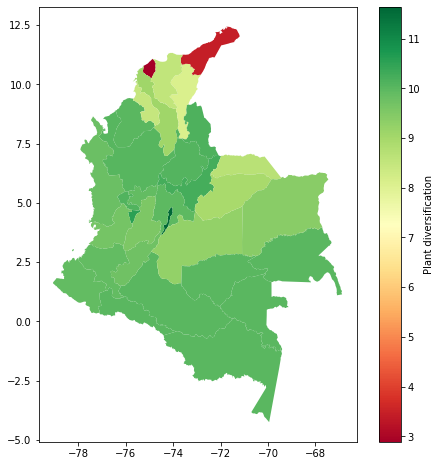

In [242]:
# Temperature variables
for var, var_name in divers_variables.items():
    var_per_depto.plot(figsize=(8, 8),
                      column=var,
                      cmap='RdYlGn',
                      legend=True, 
                      legend_kwds={'label': var_name,})
    plt.savefig("reports/figures/ecovars/{}.png".format(var_name))

# Species Distributions

In [247]:
RAW_SPECIES_PATH = "data/raw/colombia_mammals_ocurrences.csv"

In [250]:
raw_dataframe = pd.read_csv(RAW_SPECIES_PATH, sep='\t')

/home/christian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,39,41,45,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [284]:
raw_dataframe.columns
raw_dataframe = raw_dataframe[raw_dataframe['decimalLatitude'].notnull()]

In [416]:
# Missing value ratio methods
import matplotlib.pyplot as plt

def missing_value_ratio(data_frame):
  return data_frame.isnull().sum()/len(data_frame)*100

def columns_above_msr(data_frame , mvr, threshold):
  return data_frame.columns[mvr > threshold]

#Return columns under the missing value ratio
def columns_under_msr(data_frame , mvr, threshold):
  columns = data_frame.columns
  under_threshold_columns = [ ]
  for i in range(0,data_frame.columns.shape[0]):
      if mvr[i]<=threshold:
          under_threshold_columns.append(columns[i])
  return under_threshold_columns


def plot_mvr(data_frame, mvr, threshold):
  plt.figure(figsize=(20,10))
  plt.title('Feature Elements')
  plt.bar(data_frame.columns,mvr/100, color='#6593F5',label="Missing Ratio", align='center')
  plt.legend()
  plt.tight_layout()
  plt.title('Missing Value Ratio')
  plt.xlabel('Features')
  plt.ylabel('Missing Ratio')
  plt.axhline(y=threshold/100, color='r', linestyle='--')
  plt.xticks(rotation=90)
  plt.show()


# GEO DATA FUNCTIONS:

def create_geometry_points(data_frame, long_col ='decimalLongitude', lat_col = 'decimalLatitude'):
  geometry = [Point(x,y) for x,y in data_frame[[long_col,lat_col]].values]
  return geometry


def data_frame_to_geo_data_frame(data_frame, crs, geometry):
  return gpd.GeoDataFrame(data_frame, crs=crs, geometry=geometry)

def plot_points_map(geo_dataframe, base_map):
  fig, axes = plt.subplots(figsize=(10,10))
  base_map.plot(color = 'w', edgecolor='k', linewidth = 1, ax=axes)
  geo_dataframe.plot(color='g', alpha=0.5,ax=axes)
  axes.axis('off');

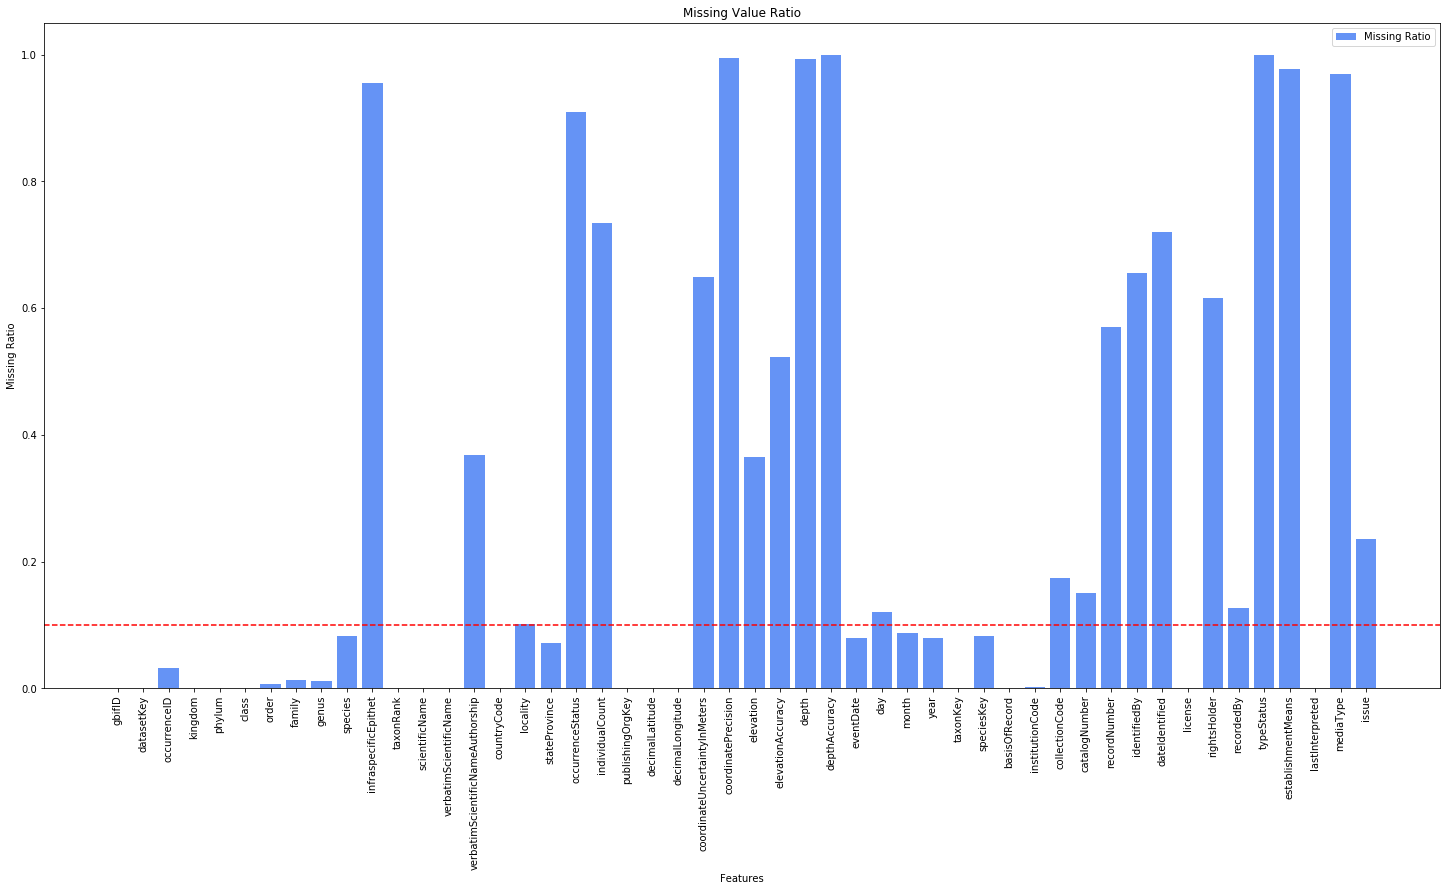

In [404]:
# Missing value ratio

# Setting a threshold for x% percent of null values 
threshold = 10

# Computing the missing value for all columns
mvr = missing_value_ratio(raw_dataframe)

# Computing columns with null values higher than threshold %
columns_above = columns_above_msr(raw_dataframe, mvr, threshold)
#print(" Columns with more than {}% of null values: \n {}".format(100-threshold, columns_above))

# Just selecting columns below threshold:
colombia_dataframe = raw_dataframe[columns_under_msr(raw_dataframe,mvr,threshold)]

plot_mvr(raw_dataframe, mvr, threshold)

In [405]:
colombia_dataframe.head(2)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,decimalLongitude,eventDate,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,license,lastInterpreted
0,1427573164,8db77d0a-f139-4f1c-b1c3-16c7fd4a17c0,IAvH:BICUB:CIENAGA:ANIMALIAPLANTAE:OBSERVACION...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Carollia,Carollia perspicillata,...,-74.0635,2015-02-17T00:00:00,2.0,2015.0,2433176,2433176.0,HUMAN_OBSERVATION,Instituto de Investigación de Recursos Biológi...,CC_BY_NC_4_0,2020-02-10T11:28:57.735Z
1,1427573165,8db77d0a-f139-4f1c-b1c3-16c7fd4a17c0,IAvH:BICUB:CIENAGA:ANIMALIAPLANTAE:OBSERVACION...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Carollia,Carollia brevicauda,...,-74.0635,2015-02-17T00:00:00,2.0,2015.0,2433177,2433177.0,HUMAN_OBSERVATION,Instituto de Investigación de Recursos Biológi...,CC_BY_NC_4_0,2020-02-10T11:28:57.737Z


In [418]:
no_relevannt_columns = ['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class','countryCode', 'publishingOrgKey', 'basisOfRecord', 'institutionCode', 'scientificName', 'species', 'taxonKey', 'license']
colombia_dataframe_organized = colombia_dataframe.drop(no_relevannt_columns, axis=1)
colombia_dataframe_organized.head(10)
colombia_dataframe_organized['verbatimScientificName']  = species_df['verbatimScientificName'].str.split("(", expand=True)[0]

In [432]:
colombia_dataframe_organized

,order,family,genus,taxonRank,verbatimScientificName,stateProvince,decimalLatitude,decimalLongitude,eventDate,month,year,speciesKey,lastInterpreted
0,Chiroptera,Phyllostomidae,Carollia,SPECIES,Carollia perspicillata,Magdalena,10.991400,-74.063500,2015-02-17T00:00:00,2.0,2015.0,2433176.0,2020-02-10T11:28:57.735Z
1,Chiroptera,Phyllostomidae,Carollia,SPECIES,Carollia brevicauda,Magdalena,10.991400,-74.063500,2015-02-17T00:00:00,2.0,2015.0,2433177.0,2020-02-10T11:28:57.737Z
2,Chiroptera,Phyllostomidae,Vampyressa,SPECIES,Vampyressa thyone,Magdalena,10.991400,-74.063500,2015-02-17T00:00:00,2.0,2015.0,4265374.0,2020-02-10T11:28:57.738Z
3,Chiroptera,Phyllostomidae,Dermanura,SPECIES,Dermanura glauca,Magdalena,10.988110,-74.067800,2015-02-16T00:00:00,2.0,2015.0,4832192.0,2020-02-10T11:28:57.740Z
4,Chiroptera,Phyllostomidae,Carollia,SPECIES,Carollia perspicillata,Magdalena,10.991400,-74.063500,2015-02-17T00:00:00,2.0,2015.0,2433176.0,2020-02-10T11:28:57.741Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Chiroptera,Phyllostomidae,Anoura,SPECIES,Anoura caudifer,Caquetá,1.720786,-75.672875,2004-06-23T00:00:00,6.0,2004.0,5963040.0,2020-02-10T11:16:50.734Z
297,Chiroptera,Vespertilionidae,Myotis,SPECIES,Myotis riparius,Huila,1.975000,-75.795556,2004-06-23T00:00:00,6.0,2004.0,2432385.0,2020-02-10T11:16:50.734Z
298,Chiroptera,Phyllostomidae,Anoura,SPECIES,Anoura geoffroyi,Huila,1.975000,-75.795556,2004-06-23T00:00:00,6.0,2004.0,5963041.0,2020-02-10T11:16:50.735Z
299,Chiroptera,Phyllostomidae,Platyrrhinus,SPECIES,Platyrrhinus dorsalis,Caquetá,1.720786,-75.672875,2004-06-25T00:00:00,6.0,2004.0,5218770.0,2020-02-10T11:16:50.736Z


In [441]:
geom_species = create_geometry_points(data_frame=colombia_dataframe_organized, long_col='decimalLongitude', lat_col='decimalLatitude')
col_mammals_geo = data_frame_to_geo_data_frame(data_frame=colombia_dataframe_organized, crs={'init':'epsg:4326'}, geometry=geom_species)
col_mammals_geo.drop(['decimalLongitude', 'decimalLatitude'], axis=1, inplace=True)
col_mammals_geo = col_mammals_geo.cx[-90:-66, -5:14]

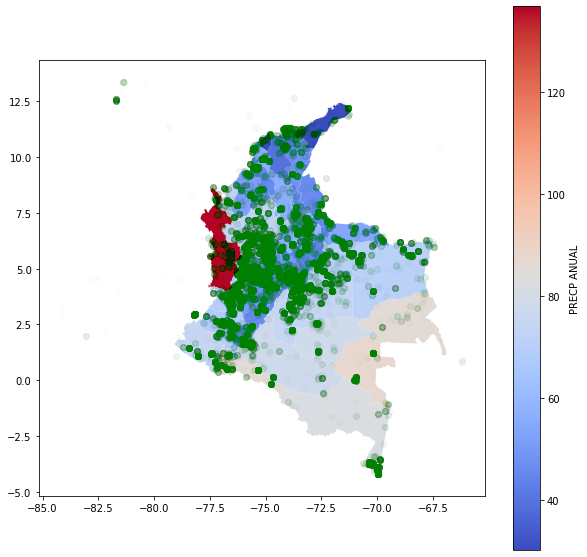

In [483]:
fig, ax = plt.subplots(figsize=(10,10))

var_per_depto.plot(figsize=(8, 8),
                  column='Precipitation - annual',
                  ax = ax,
                  cmap='coolwarm',
                  legend=True, 
                  legend_kwds={'label': "PRECP ANUAL",
                              })

# Latitudes entre -5 y 14 grados 
# Longitudes entre -90 y -66 grados
    
col_mammals_geo.plot(ax=ax, 
                    alpha=0.01,
                    color='green')

In [471]:
def group_elements(geo_dataframe, group_column, count_columns, sort_columns):
  group = geo_dataframe.groupby(group_column)
  series_columns = {}
  for column_name in count_columns:
    series_columns[column_name] = pd.Series.nunique
  count_dataframe = group.agg(series_columns)
  # sort the list ascending
  count_dataframe = count_dataframe.sort_values(by = sort_columns, ascending=False)
  return count_dataframe


def merge_geometry_and_data(geometry, data_frame, comon, to_merge_columns): 
  names = geometry.NOMBRE_DPT.apply(lambda x: x.title())
  # new GeoDataFrame with geometry
  geometry_dataframe = gpd.GeoDataFrame(names, crs=crs, geometry=geometry.geometry)
  data = data_frame[to_merge_columns]
  geometry_dataframe = geometry_dataframe.rename(columns={"NOMBRE_DPT": comon})
  geometry_dataframe = geometry_dataframe.merge(data, on=comon)
  return geometry_dataframe


def plot_choropleth_map(geo_dataframe, column):
  fig, ax1 = plt.subplots(figsize=(10,10))
  x = column
  geo_dataframe.plot(column=x, ax=ax1, legend=True, legend_kwds={'label': "Amount of {}".format(x),'orientation': "vertical"})


In [472]:
group_elements_dataframe = group_elements(col_mammals_geo,'stateProvince',['family', 'genus', 'verbatimScientificName'], ['verbatimScientificName'])

In [476]:
species_counts_geo = merge_geometry_and_data(geometry=deptos_shapes, 
                        data_frame=group_elements_dataframe, 
                        comon='stateProvince', 
                        to_merge_columns=['family','genus', 'verbatimScientificName'])

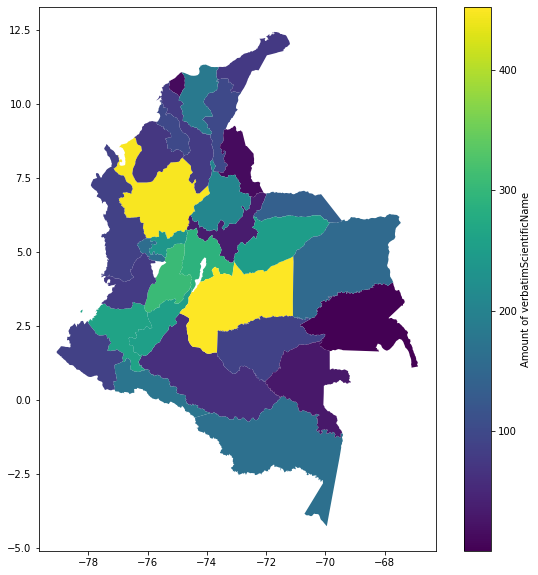

In [479]:
plot_choropleth_map(species_counts_geo, column='verbatimScientificName')
plt.savefig("reports/figures/ecovars/SpeciesDiversity.png")